<a href="https://colab.research.google.com/github/ylmgrbzz/Drug-Review-Data-Analysis-with-Pandas-Numpy-Matplotlib-Seaborn-Textblob-/blob/main/Drug_Review_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas.util.testing as tm
from textblob import TextBlob


In [17]:
df = pd.read_csv("drugsComTrain_raw.tsv",sep='\t')


In [18]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [21]:
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [22]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [24]:
df['drugName'].unique().tolist()

['Valsartan',
 'Guanfacine',
 'Lybrel',
 'Ortho Evra',
 'Buprenorphine / naloxone',
 'Cialis',
 'Levonorgestrel',
 'Aripiprazole',
 'Keppra',
 'Ethinyl estradiol / levonorgestrel',
 'Topiramate',
 'L-methylfolate',
 'Pentasa',
 'Dextromethorphan',
 'Nexplanon',
 'Liraglutide',
 'Trimethoprim',
 'Amitriptyline',
 'Lamotrigine',
 'Nilotinib',
 'Atripla',
 'Trazodone',
 'Etonogestrel',
 'Etanercept',
 'Tioconazole',
 'Azithromycin',
 'Eflornithine',
 'Daytrana',
 'Ativan',
 'Imitrex',
 'Sertraline',
 'Toradol',
 'Viberzi',
 'Mobic',
 'Dulcolax',
 'Morphine',
 'MoviPrep',
 'Trilafon',
 'Fluconazole',
 'Contrave',
 'Clonazepam',
 'Metaxalone',
 'Venlafaxine',
 'Ledipasvir / sofosbuvir',
 'Symbyax',
 'Tamsulosin',
 'Doxycycline',
 'Dulaglutide',
 'Intuniv',
 'Buprenorphine',
 'Qvar',
 'Opdivo',
 'Pyridium',
 'Latuda',
 'Bupropion',
 'Implanon',
 'Effexor XR',
 'Drospirenone / ethinyl estradiol',
 'NuvaRing',
 'Prepopik',
 'Tretinoin',
 'Gildess Fe 1 / 20',
 'Ethinyl estradiol / norgestimate'

In [25]:
len(df['drugName'].unique().tolist())

3436

In [26]:
df['drugName'].value_counts().nlargest(20)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Medroxyprogesterone                    995
Citalopram                             995
Lexapro                                952
Bupropion / naltrexone                 950
Duloxetine                             934
Name: drugName, dtype: int64

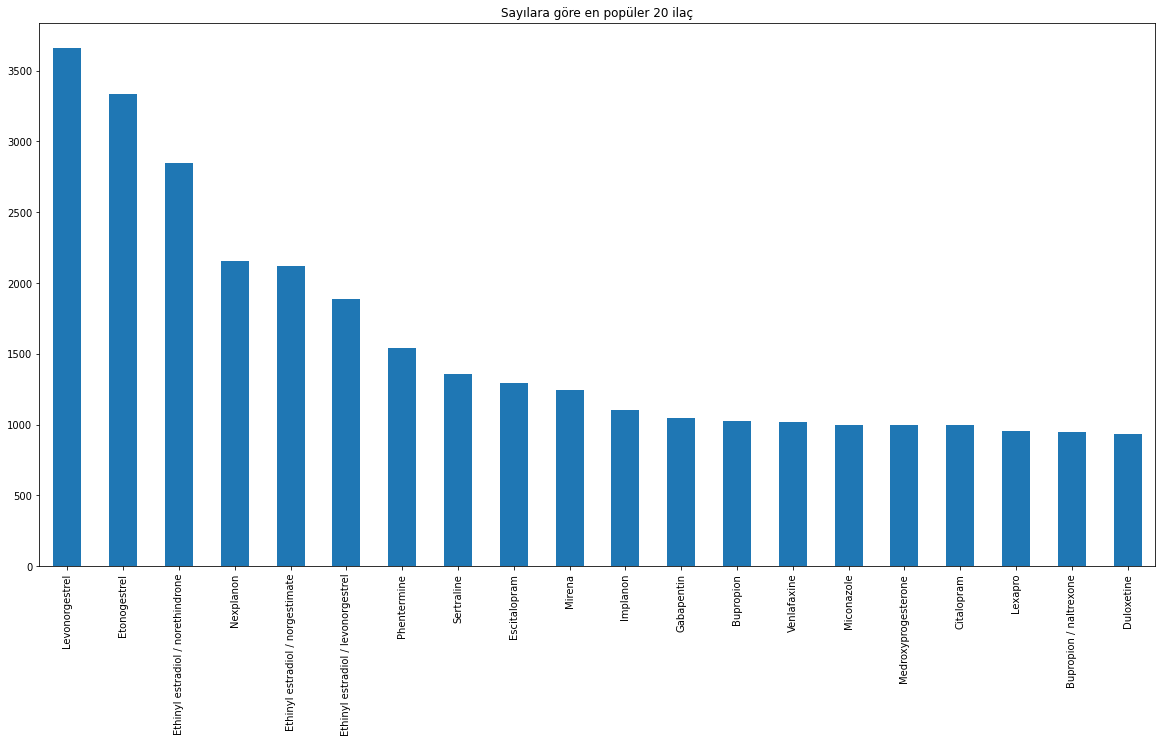

In [28]:
plt.figure(figsize=(20,10))
df['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Sayılara göre en popüler 20 ilaç")
plt.show()

In [29]:
df['drugName'].value_counts().nsmallest(20)


Clemastine                         1
Topicort LP                        1
Smoothie Readi-Cat 2               1
Ipratropium Inhalation Solution    1
Olux-E                             1
Hexachlorophene                    1
Pedi-Dri                           1
Ginseng                            1
Lincocin                           1
EnLyte                             1
Tums Smoothies                     1
Purinethol                         1
Aldomet                            1
Midol Extended Relief              1
Travel-Eze                         1
Ponatinib                          1
Wal-finate                         1
Ciclodan                           1
Niacinamide                        1
Fragmin                            1
Name: drugName, dtype: int64

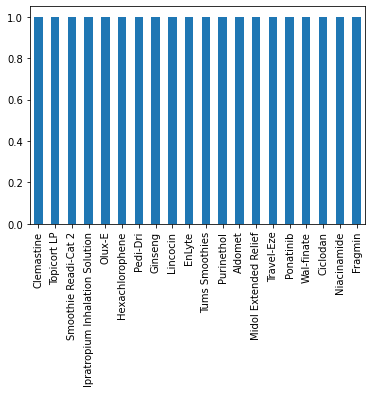

In [30]:
df['drugName'].value_counts().nsmallest(20).plot(kind='bar')


In [31]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)","mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [32]:
def classify_drug(drugname):
  for i in drug_suffix.keys():
    if drugname.endswith(i):
      print(True)
      print(drug_suffix[i])

In [36]:
classify_drug('Valsartan')

True
arb blocker


In [37]:
classify_drug('losartan')


True
arb blocker


In [38]:
def classify_drug(drugname):
    for i in drug_suffix.keys():
        if drugname.endswith(i):
            return drug_suffix[i]

In [39]:
classify_drug('valsartan')


'arb blocker'

In [40]:
df['drug_class'] = df['drugName'].apply(classify_drug)


In [41]:
df[['drugName','drug_class']]


,drugName,drug_class
0,Valsartan,arb blocker
1,Guanfacine,None
2,Lybrel,None
3,Ortho Evra,None
4,Buprenorphine / naloxone,None
...,...,...
161292,Campral,None
161293,Metoclopramide,oral hypoglycemics
161294,Orencia,None
161295,Thyroid desiccated,None


In [42]:
df['drug_class'].unique().tolist()



['arb blocker',
 None,
 'antifungal (except metronidazole)',
 'oral hypoglycemics',
 'opiod analgesics',
 'antibiotic',
 'anti-anxiety',
 'h2 blockers (anti-ulcers)',
 'beta blockers',
 'ace inhibitor',
 'thrombolytics',
 'alpha blocker',
 'corticosteroid (prednisone)',
 'antipyschotics (phenothiazine)',
 'antibiotic(penicillins)',
 'barbiturate',
 'calcium channel blocker',
 'anesthetic',
 'pituitary hormone',
 'antibiotic (cephalosporins)',
 'beta blocker',
 'neuromuscular blocking agents',
 'anticoagulants']

In [43]:
len(df['drug_class'].unique().tolist())


23

In [44]:
df['drug_class'].value_counts()


antifungal (except metronidazole)    4201
opiod analgesics                     3945
oral hypoglycemics                   3555
antibiotic                           3401
anti-anxiety                         2645
h2 blockers (anti-ulcers)            1228
beta blockers                         966
corticosteroid (prednisone)           886
antipyschotics (phenothiazine)        664
arb blocker                           560
ace inhibitor                         432
calcium channel blocker               233
alpha blocker                         153
anesthetic                            129
antibiotic(penicillins)               119
thrombolytics                         116
beta blocker                           97
neuromuscular blocking agents          45
antibiotic (cephalosporins)            29
pituitary hormone                      28
barbiturate                            19
anticoagulants                          9
Name: drug_class, dtype: int64

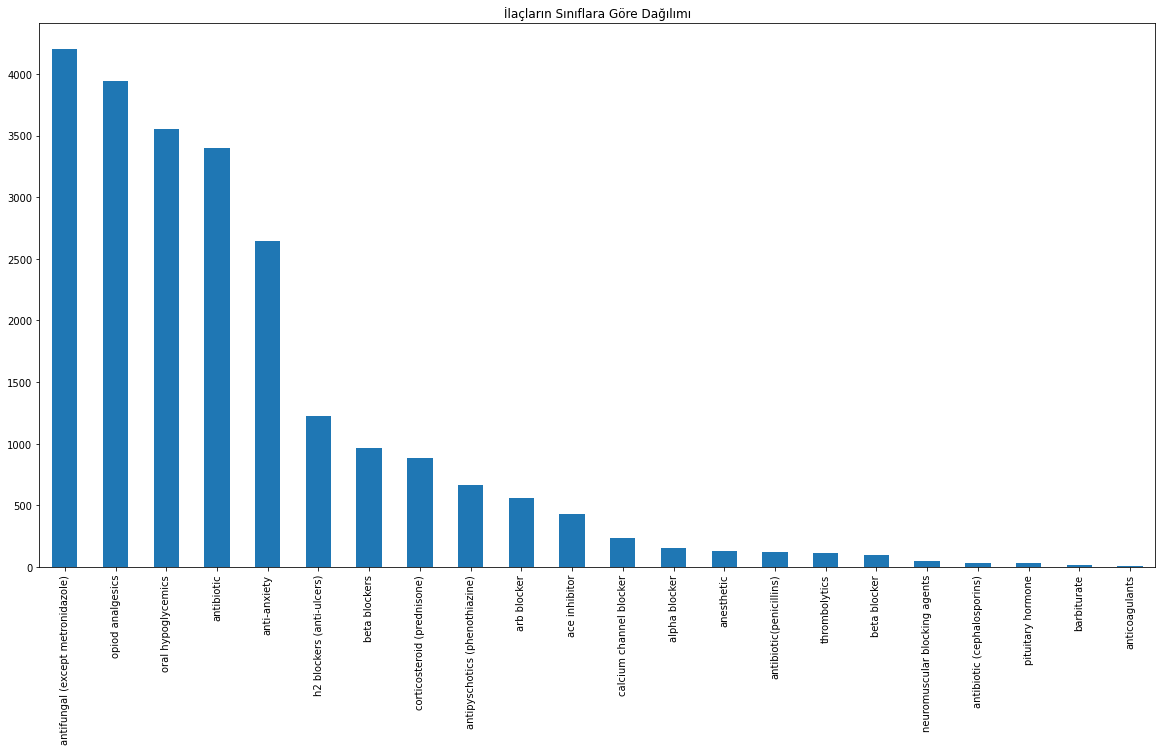

In [45]:
plt.figure(figsize=(20,10))
df['drug_class'].value_counts().plot(kind='bar')
plt.title("İlaçların Sınıflara Göre Dağılımı")
plt.show()

In [46]:
df['condition'].unique()


array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       nan, 'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'U

In [47]:
len(df['condition'].unique().tolist())


885

In [48]:
df['condition'].value_counts()


Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

In [49]:
df['condition'].value_counts().nlargest(20)


Birth Control                28788
Depression                    9069
Pain                          6145
Anxiety                       5904
Acne                          5588
Bipolar Disorde               4224
Insomnia                      3673
Weight Loss                   3609
Obesity                       3568
ADHD                          3383
Diabetes, Type 2              2554
Emergency Contraception       2463
High Blood Pressure           2321
Vaginal Yeast Infection       2274
Abnormal Uterine Bleeding     2096
Bowel Preparation             1859
ibromyalgia                   1791
Smoking Cessation             1780
Migraine                      1694
Anxiety and Stress            1663
Name: condition, dtype: int64

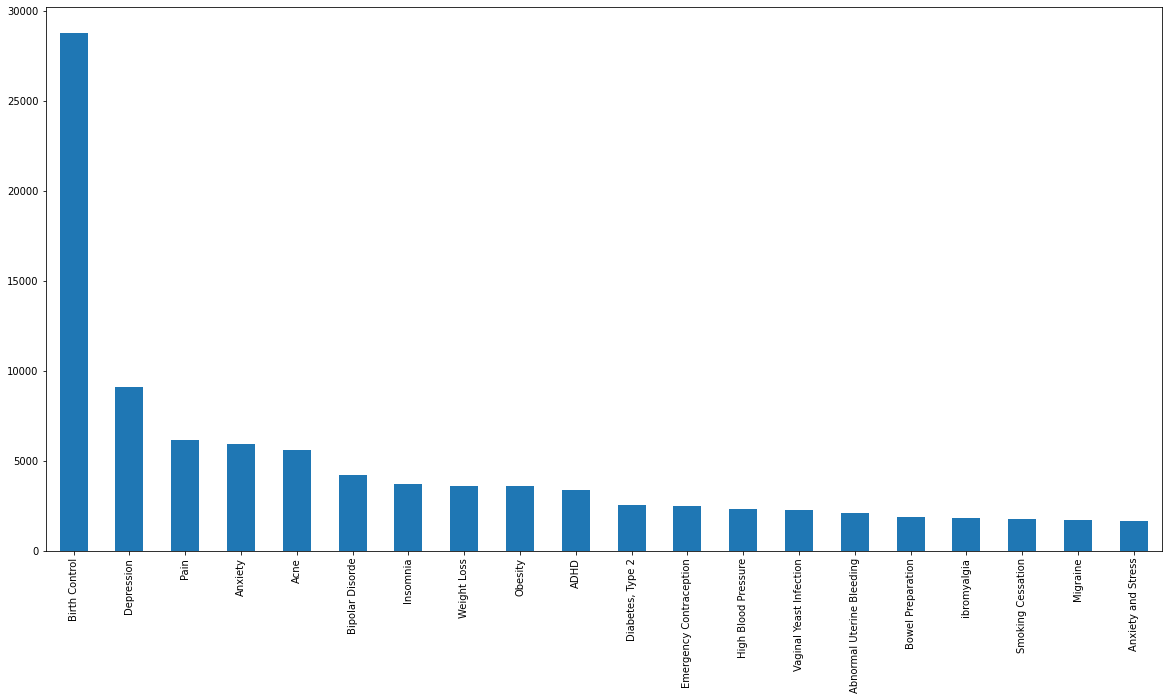

In [50]:
df['condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))


In [51]:
df['condition'].value_counts().nsmallest(20)


Meningococcal Meningitis Prophylaxis                     1
mist (                                                   1
Cluster-Tic Syndrome                                     1
Syringomyelia                                            1
Gestational Diabetes                                     1
Aspergillosis, Aspergilloma                              1
Pseudogout, Prophylaxis                                  1
Portal Hypertension                                      1
Reversal of Nondepolarizing Muscle Relaxants             1
47</span> users found this comment helpful.              1
Short Stature for Age                                    1
Neurotic Depression                                      1
Cerebral Edema                                           1
me                                                       1
Hyperuricemia Secondary to Chemotherapy                  1
Prevention of Perinatal Group B Streptococcal Disease    1
Small Bowel or Pancreatic Fistula                       

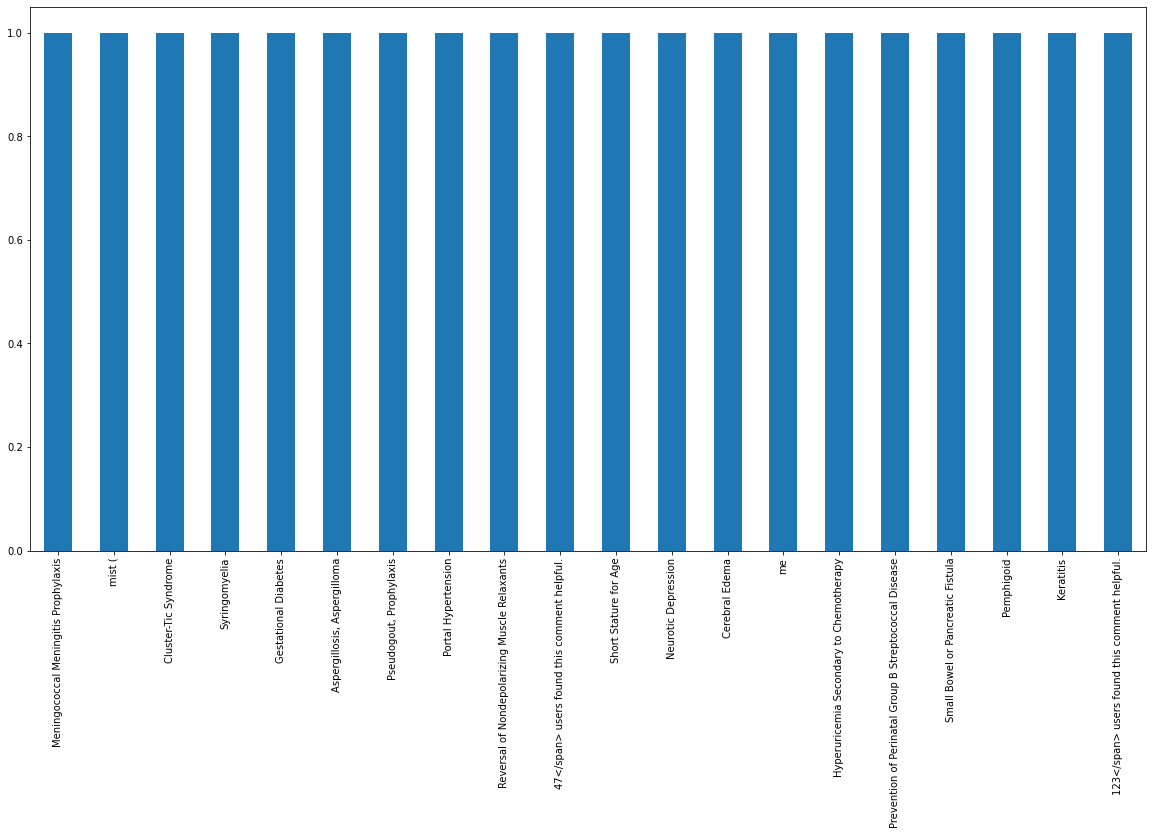

In [52]:
df['condition'].value_counts().nsmallest(20).plot(kind='bar',figsize=(20,10))


In [55]:
df.groupby('condition')['drugName'].nunique().nlargest(20)


condition
Not Listed / Othe                             214
Pain                                          200
Birth Control                                 172
High Blood Pressure                           140
Acne                                          117
Depression                                    105
Rheumatoid Arthritis                           98
Diabetes, Type 2                               89
Allergic Rhinitis                              88
Bipolar Disorde                                80
Osteoarthritis                                 80
Anxiety                                        78
Insomnia                                       78
Abnormal Uterine Bleeding                      74
Migraine                                       59
Psoriasis                                      58
3</span> users found this comment helpful.     57
Endometriosis                                  57
ADHD                                           55
Asthma, Maintenance                     

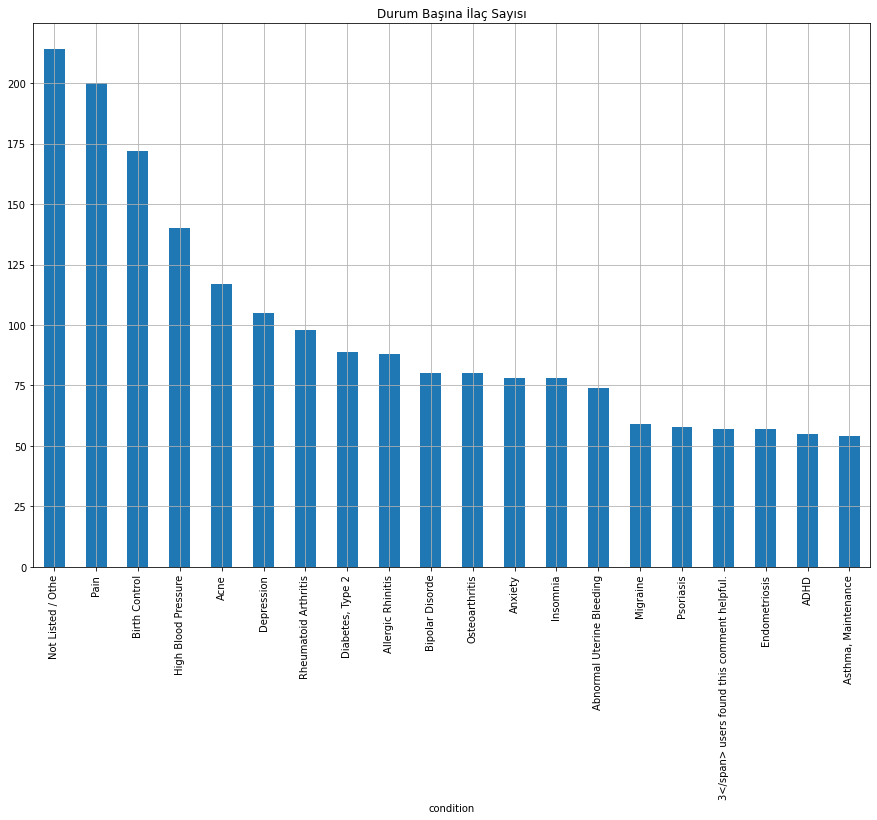

In [56]:
plt.figure(figsize=(15,10))
df.groupby('condition')['drugName'].nunique().nlargest(20).plot(kind='bar')
plt.title("Durum Başına İlaç Sayısı")
plt.grid()
plt.show()

In [58]:
drug_groups = df.groupby('drug_class').size()
drug_groups

drug_class
ace inhibitor                         432
alpha blocker                         153
anesthetic                            129
anti-anxiety                         2645
antibiotic                           3401
antibiotic (cephalosporins)            29
antibiotic(penicillins)               119
anticoagulants                          9
antifungal (except metronidazole)    4201
antipyschotics (phenothiazine)        664
arb blocker                           560
barbiturate                            19
beta blocker                           97
beta blockers                         966
calcium channel blocker               233
corticosteroid (prednisone)           886
h2 blockers (anti-ulcers)            1228
neuromuscular blocking agents          45
opiod analgesics                     3945
oral hypoglycemics                   3555
pituitary hormone                      28
thrombolytics                         116
dtype: int64

In [61]:
type(drug_groups)


pandas.core.series.Series

In [62]:
drug_groups.to_frame()


,0
drug_class,
ace inhibitor,432
alpha blocker,153
anesthetic,129
anti-anxiety,2645
antibiotic,3401
antibiotic (cephalosporins),29
antibiotic(penicillins),119
anticoagulants,9
antifungal (except metronidazole),4201


In [63]:
drug_groups_df = pd.DataFrame({'drug_class':drug_groups.index,'counts':drug_groups.values})


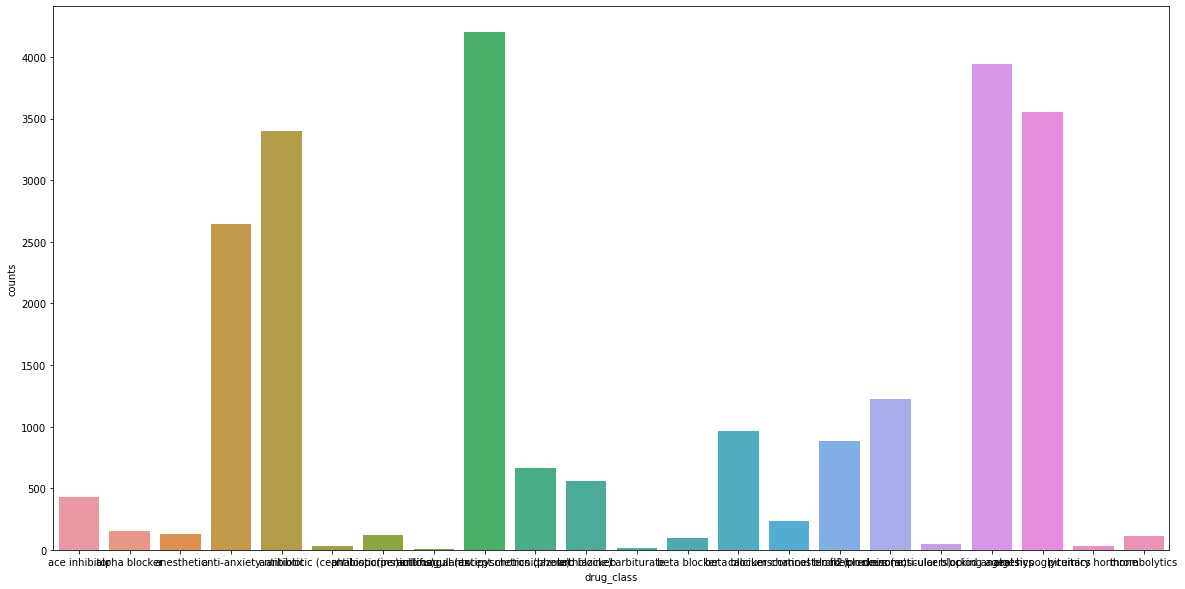

In [64]:
plt.figure(figsize=(20,10))
g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
plt.show()

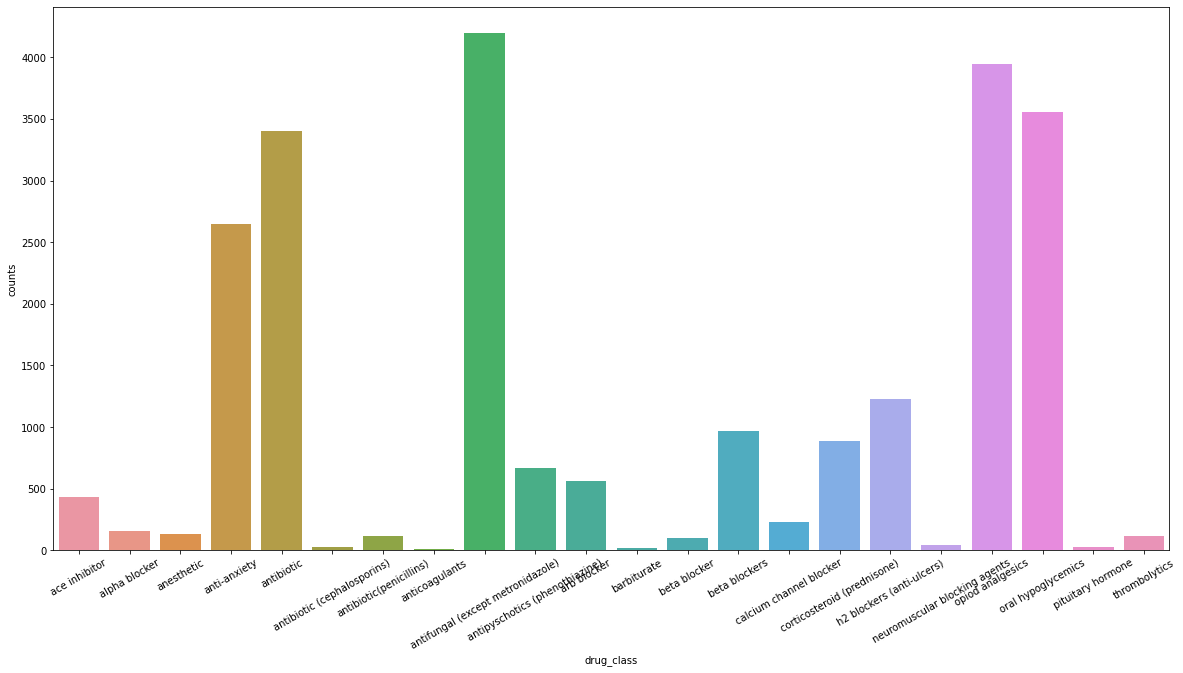

In [65]:
plt.figure(figsize=(20,10))
g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
g.set_xticklabels(drug_groups_df['drug_class'].values,rotation=30)
plt.show()

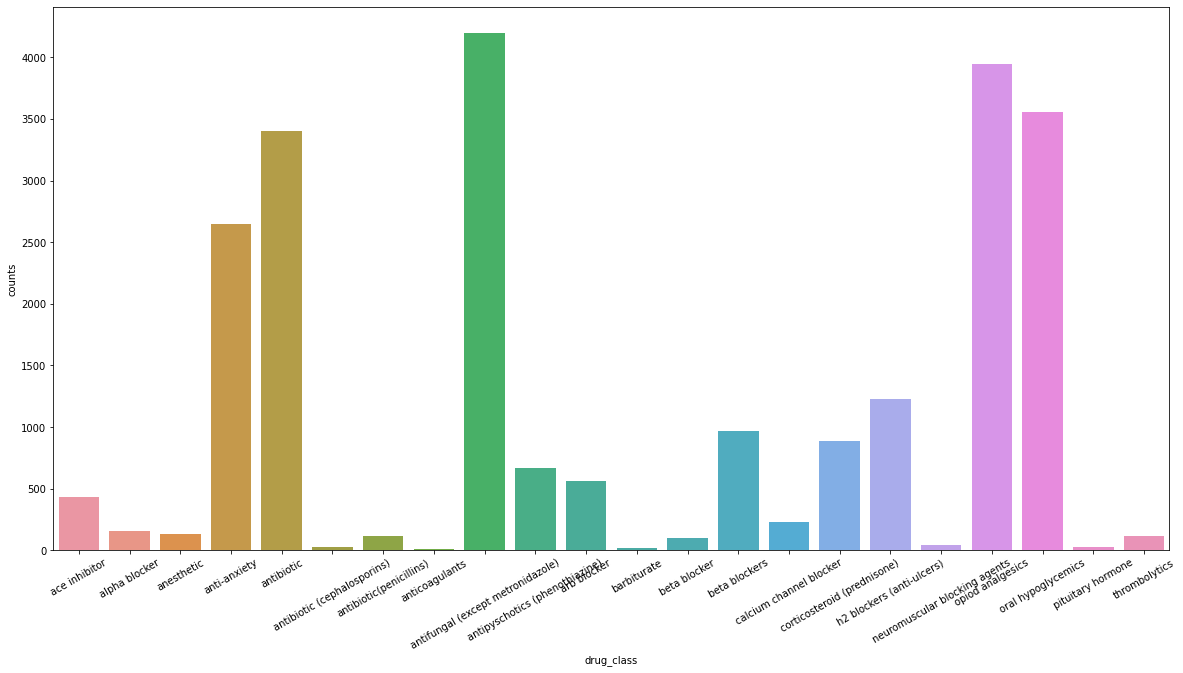

In [66]:
plt.figure(figsize=(20,10))
g = sns.barplot(data=drug_groups_df,x='drug_class',y='counts')
plt.xticks(rotation=30)
plt.show()

In [68]:
df['rating']


0          9.0
1          8.0
2          5.0
3          8.0
4          9.0
          ... 
161292    10.0
161293     1.0
161294     2.0
161295    10.0
161296     9.0
Name: rating, Length: 161297, dtype: float64

In [67]:
df.groupby('rating').size()


rating
1.0     21619
2.0      6931
3.0      6513
4.0      5012
5.0      8013
6.0      6343
7.0      9456
8.0     18890
9.0     27531
10.0    50989
dtype: int64

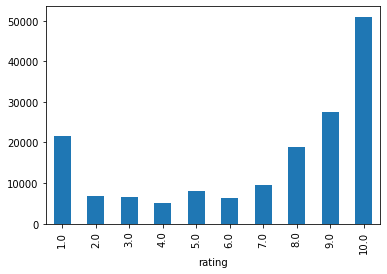

In [69]:
df.groupby('rating').size().plot(kind='bar')


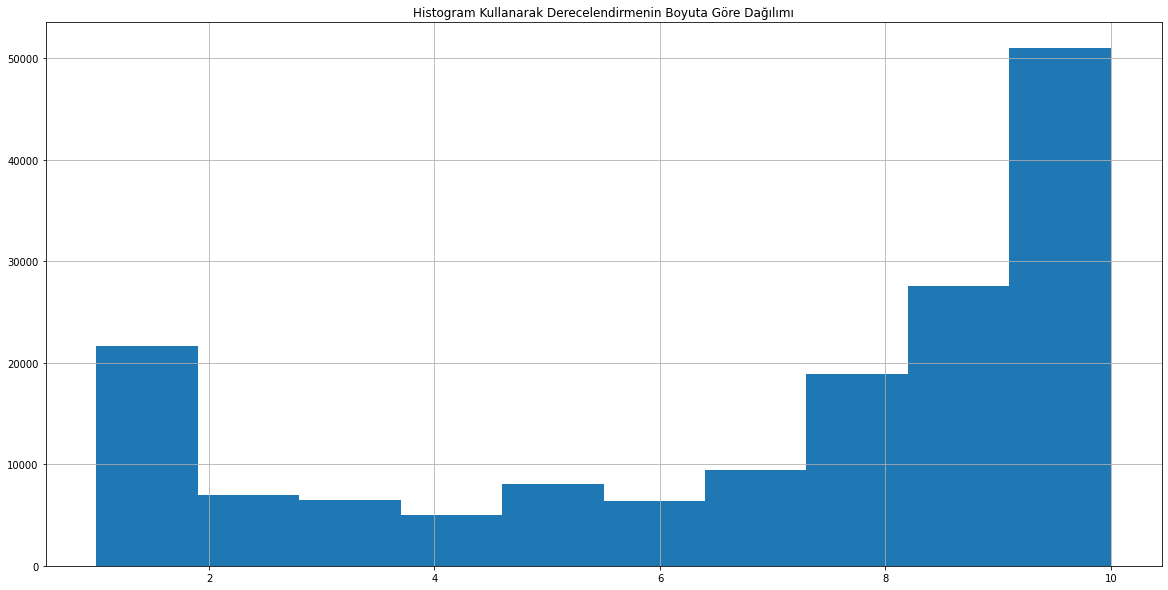

In [70]:
plt.figure(figsize=(20,10))
df['rating'].hist()
plt.title("Histogram Kullanarak Derecelendirmenin Boyuta Göre Dağılımı")
plt.show()

In [79]:
df['drugName']

0                        Valsartan
1                       Guanfacine
2                           Lybrel
3                       Ortho Evra
4         Buprenorphine / naloxone
                    ...           
161292                     Campral
161293              Metoclopramide
161294                     Orencia
161295          Thyroid desiccated
161296                Lubiprostone
Name: drugName, Length: 161297, dtype: object

In [75]:
avg_rating = (df['rating'].groupby(df['drugName']).mean())


In [76]:
avg_rating


drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     8.211538
Abacavir / lamivudine / zidovudine       9.000000
Abatacept                                7.157895
                                          ...    
Zyvox                                    9.000000
ZzzQuil                                  2.500000
depo-subQ provera 104                    1.000000
ella                                     6.980392
femhrt                                   4.000000
Name: rating, Length: 3436, dtype: float64

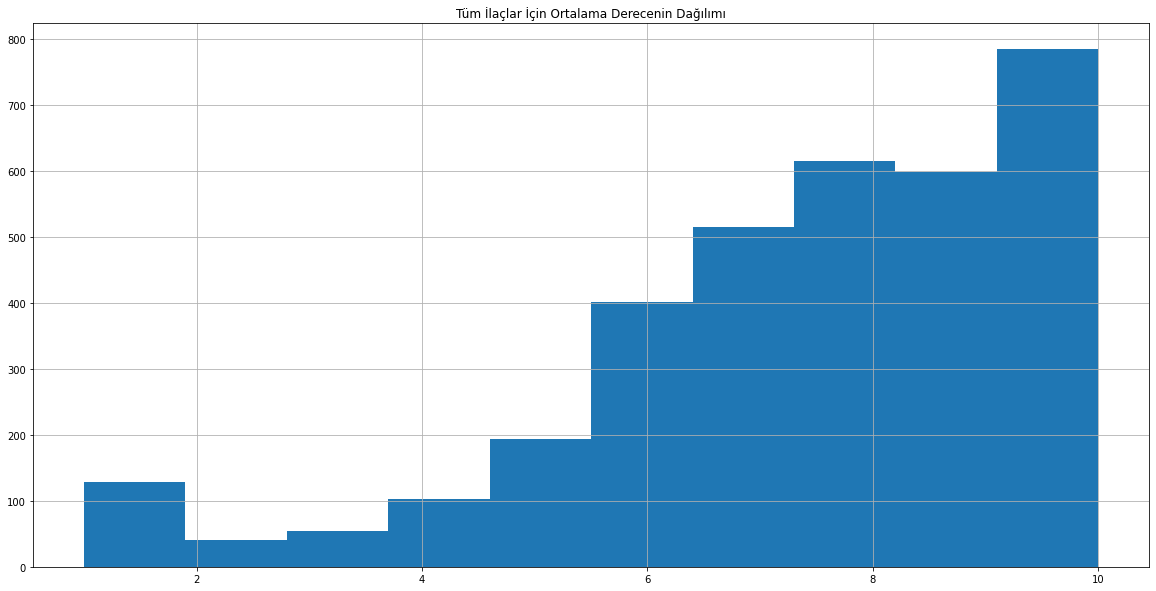

In [81]:
plt.figure(figsize=(20,10))
avg_rating.hist()
plt.title("Tüm İlaçlar İçin Ortalama Derecenin Dağılımı")
plt.show()

In [82]:
avg_rating_per_drug_class = (df['rating'].groupby(df['drug_class']).mean())


In [83]:
avg_rating_per_drug_class

drug_class
ace inhibitor                        5.759259
alpha blocker                        6.954248
anesthetic                           5.937984
anti-anxiety                         8.543667
antibiotic                           6.500735
antibiotic (cephalosporins)          6.344828
antibiotic(penicillins)              7.033613
anticoagulants                       9.222222
antifungal (except metronidazole)    5.580100
antipyschotics (phenothiazine)       7.146084
arb blocker                          6.464286
barbiturate                          8.894737
beta blocker                         6.587629
beta blockers                        7.681159
calcium channel blocker              5.725322
corticosteroid (prednisone)          7.477427
h2 blockers (anti-ulcers)            7.280945
neuromuscular blocking agents        8.622222
opiod analgesics                     7.446388
oral hypoglycemics                   7.268917
pituitary hormone                    8.500000
thrombolytics          

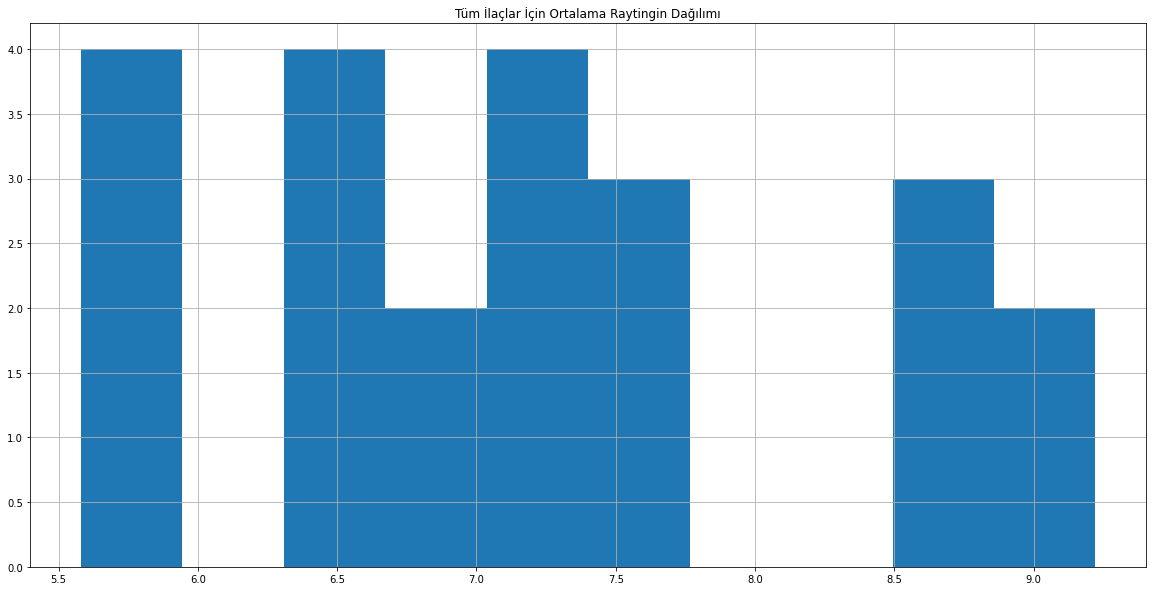

In [84]:
plt.figure(figsize=(20,10))
avg_rating_per_drug_class.hist()
plt.title("Tüm İlaçlar İçin Ortalama Raytingin Dağılımı")
plt.show()

In [85]:
avg_rating_per_drug_class.nlargest(20)


drug_class
anticoagulants                    9.222222
barbiturate                       8.894737
neuromuscular blocking agents     8.622222
anti-anxiety                      8.543667
pituitary hormone                 8.500000
beta blockers                     7.681159
corticosteroid (prednisone)       7.477427
opiod analgesics                  7.446388
h2 blockers (anti-ulcers)         7.280945
oral hypoglycemics                7.268917
antipyschotics (phenothiazine)    7.146084
thrombolytics                     7.103448
antibiotic(penicillins)           7.033613
alpha blocker                     6.954248
beta blocker                      6.587629
antibiotic                        6.500735
arb blocker                       6.464286
antibiotic (cephalosporins)       6.344828
anesthetic                        5.937984
ace inhibitor                     5.759259
Name: rating, dtype: float64

In [86]:
avg_rating.nlargest(20)


drugName
A + D Cracked Skin Relief                              10.0
A / B Otic                                             10.0
Absorbine Jr.                                          10.0
Accolate                                               10.0
Acetaminophen / caffeine / magnesium salicylate        10.0
Acetaminophen / dextromethorphan / doxylamine          10.0
Acetaminophen / phenylephrine                          10.0
Acetaminophen / pseudoephedrine                        10.0
Acetic acid / antipyrine / benzocaine / polycosanol    10.0
Acrivastine / pseudoephedrine                          10.0
Acyclovir / hydrocortisone                             10.0
Advil Cold and Sinus Liqui-Gels                        10.0
Aerobid-M                                              10.0
Afrin 4 Hour Extra Moisturizing                        10.0
Ala-Quin                                               10.0
Alavert                                                10.0
Aldactazide                    

In [87]:
from textblob import TextBlob


In [88]:
df.columns


Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'drug_class'],
      dtype='object')

In [89]:
df['review']


0         "It has no side effect, I take it in combinati...
1         "My son is halfway through his fourth week of ...
2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
4         "Suboxone has completely turned my life around...
                                ...                        
161292    "I wrote my first report in Mid-October of 201...
161293    "I was given this in IV before surgey. I immed...
161294    "Limited improvement after 4 months, developed...
161295    "I&#039;ve been on thyroid medication 49 years...
161296    "I&#039;ve had chronic constipation all my adu...
Name: review, Length: 161297, dtype: object

In [91]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [92]:
get_sentiment("I love apples")


0.5

In [93]:
get_sentiment_label("I love apples")


'positive'

In [94]:
df['sentiment'] = df['review'].apply(get_sentiment)


In [95]:
df['sentiment_label'] = df['review'].apply(get_sentiment_label)


In [96]:
df[['review','sentiment','sentiment_label']]


,review,sentiment,sentiment_label
0,"""It has no side effect, I take it in combinati...",0.000000,neutral
1,"""My son is halfway through his fourth week of ...",0.168333,positive
2,"""I used to take another oral contraceptive, wh...",0.067210,positive
3,"""This is my first time using any form of birth...",0.179545,positive
4,"""Suboxone has completely turned my life around...",0.194444,positive
...,...,...,...
161292,"""I wrote my first report in Mid-October of 201...",0.262917,positive
161293,"""I was given this in IV before surgey. I immed...",-0.276389,negative
161294,"""Limited improvement after 4 months, developed...",-0.223810,negative
161295,"""I&#039;ve been on thyroid medication 49 years...",0.212597,positive


In [97]:
df['sentiment_label'].value_counts()


positive    101041
negative     53303
neutral       6953
Name: sentiment_label, dtype: int64

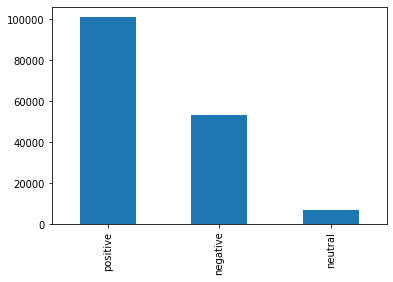

In [98]:
df['sentiment_label'].value_counts().plot(kind='bar')


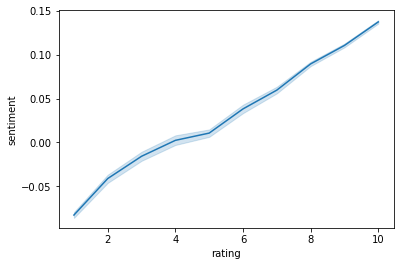

In [99]:
sns.lineplot(data=df,x='rating',y='sentiment')
plt.show()

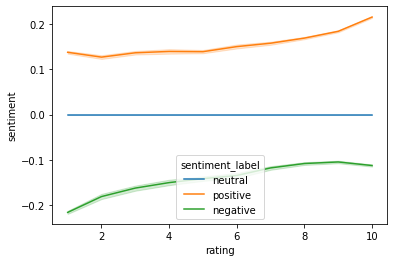

In [100]:
sns.lineplot(data=df,x='rating',y='sentiment',hue='sentiment_label')


In [101]:
good_review =  df[(df['rating'] >= 6) & (df['sentiment_label'] == 'positive')]


In [102]:
bad_review = df[(df['rating'] <= 4) & (df['sentiment_label'] == 'negative')]


In [103]:
good_review.head()


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,None,0.168333,positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,None,0.179545,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,None,0.194444,positive
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32,antifungal (except metronidazole),0.074107,positive
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1,None,0.079167,positive


In [104]:
good_review.iloc[0]['review']


'"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."'

In [105]:
df['usefulCount']

0          27
1         192
2          17
3          10
4          37
         ... 
161292    125
161293     34
161294     35
161295     79
161296    116
Name: usefulCount, Length: 161297, dtype: int64

In [106]:
df.groupby('drugName')['usefulCount'].value_counts()


drugName                              usefulCount
A + D Cracked Skin Relief             6              1
A / B Otic                            20             1
Abacavir / dolutegravir / lamivudine  9              6
                                      1              5
                                      12             5
                                                    ..
ella                                  32             1
                                      42             1
femhrt                                0              1
                                      2              1
                                      42             1
Name: usefulCount, Length: 54324, dtype: int64

In [107]:
df.groupby('drugName')['usefulCount'].nunique().nlargest(20)


drugName
Fluoxetine       181
Gabapentin       181
Bupropion        177
Citalopram       176
Sertraline       172
Escitalopram     171
Prozac           171
Zoloft           171
Lexapro          169
Celexa           166
Amitriptyline    162
Lorcaserin       157
Trazodone        157
Duloxetine       153
Phentermine      150
Belviq           148
Alprazolam       146
Cymbalta         144
Venlafaxine      144
BuSpar           141
Name: usefulCount, dtype: int64

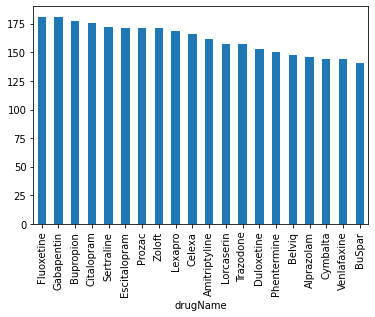

In [108]:
df.groupby('drugName')['usefulCount'].nunique().nlargest(20).plot(kind='bar')


In [109]:
df.groupby('drug_class')['usefulCount'].nunique().nlargest(20)


drug_class
opiod analgesics                     212
anti-anxiety                         198
oral hypoglycemics                   157
h2 blockers (anti-ulcers)            147
antifungal (except metronidazole)    139
arb blocker                          129
beta blockers                        123
antibiotic                           118
ace inhibitor                        111
calcium channel blocker              108
corticosteroid (prednisone)           97
antipyschotics (phenothiazine)        95
alpha blocker                         73
beta blocker                          65
antibiotic(penicillins)               60
thrombolytics                         59
anesthetic                            47
neuromuscular blocking agents         37
antibiotic (cephalosporins)           20
barbiturate                           16
Name: usefulCount, dtype: int64

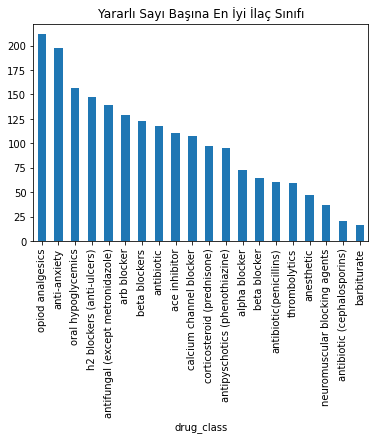

In [110]:
df.groupby('drug_class')['usefulCount'].nunique().nlargest(20).plot(kind='bar')
plt.title("Yararlı Sayı Başına En İyi İlaç Sınıfı")
plt.show()

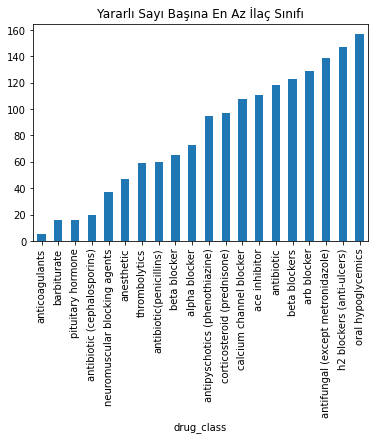

In [111]:
df.groupby('drug_class')['usefulCount'].nunique().nsmallest(20).plot(kind='bar')
plt.title("Yararlı Sayı Başına En Az İlaç Sınıfı")
plt.show()

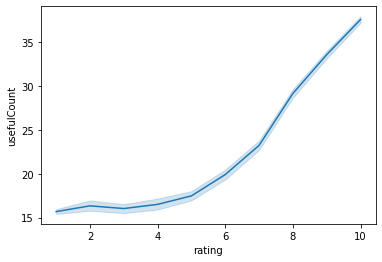

In [112]:
sns.lineplot(data=df,x='rating',y='usefulCount')


In [113]:
df.groupby('date')['rating'].size()


date
April 1, 2008        28
April 1, 2009        21
April 1, 2010        16
April 1, 2011        12
April 1, 2012        21
                     ..
September 9, 2013    44
September 9, 2014    45
September 9, 2015    90
September 9, 2016    99
September 9, 2017    55
Name: rating, Length: 3579, dtype: int64

In [114]:
df.groupby('date')['rating'].mean()


date
April 1, 2008        8.285714
April 1, 2009        7.666667
April 1, 2010        7.812500
April 1, 2011        8.583333
April 1, 2012        9.238095
                       ...   
September 9, 2013    8.295455
September 9, 2014    8.800000
September 9, 2015    5.733333
September 9, 2016    6.777778
September 9, 2017    5.127273
Name: rating, Length: 3579, dtype: float64

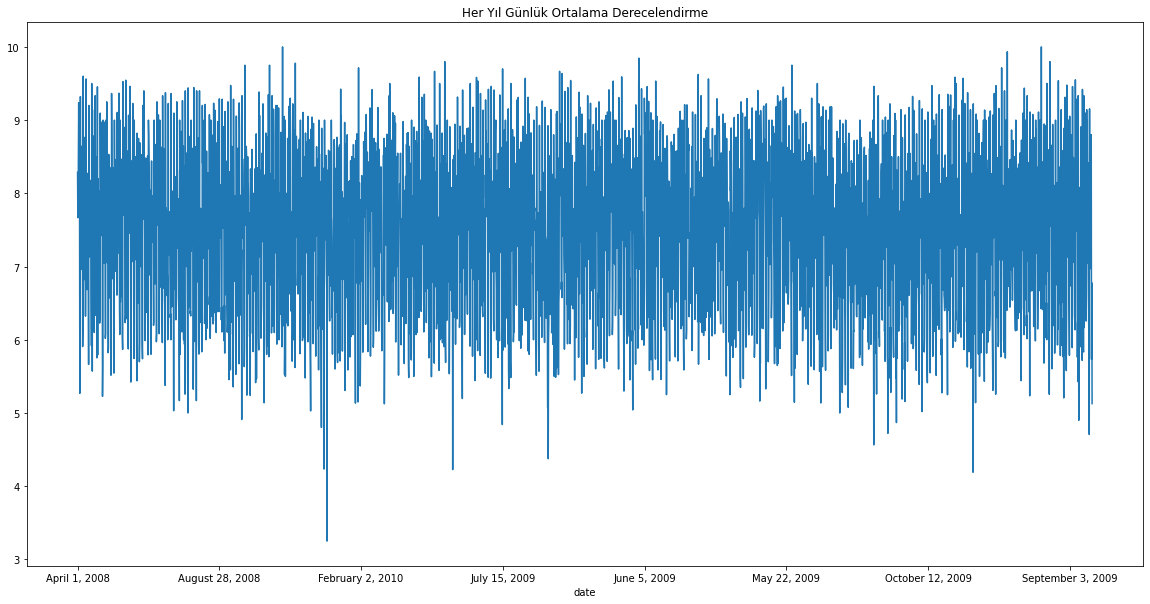

In [115]:
df.groupby('date')['rating'].mean().plot(figsize=(20,10))
plt.title("Her Yıl Günlük Ortalama Derecelendirme")
plt.show()

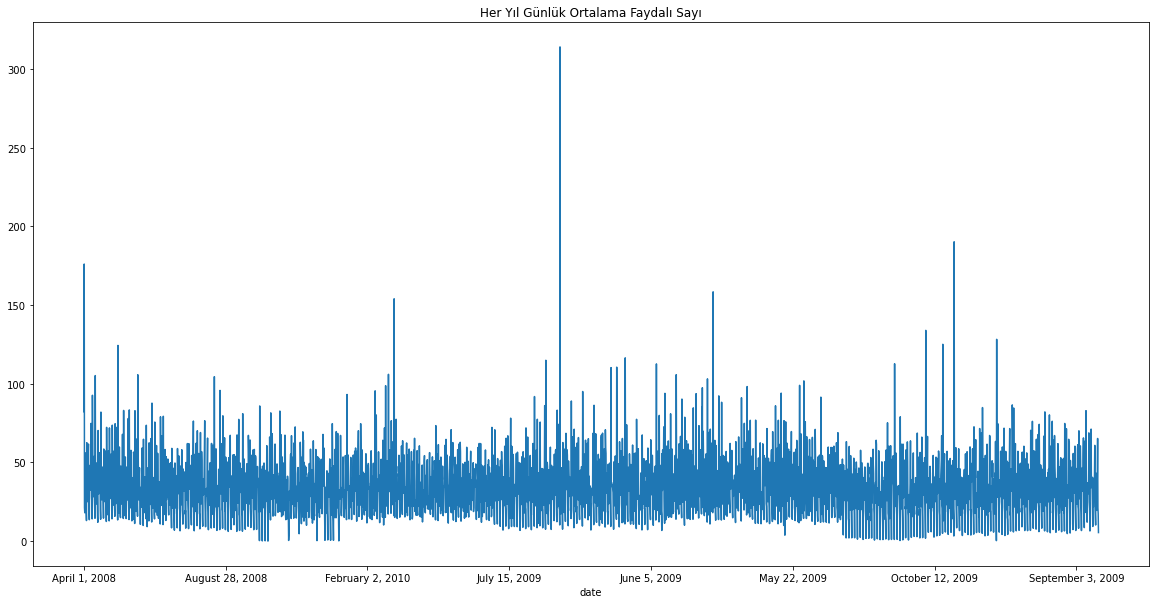

In [116]:
df.groupby('date')['usefulCount'].mean().plot(figsize=(20,10))
plt.title("Her Yıl Günlük Ortalama Faydalı Sayı")
plt.show()

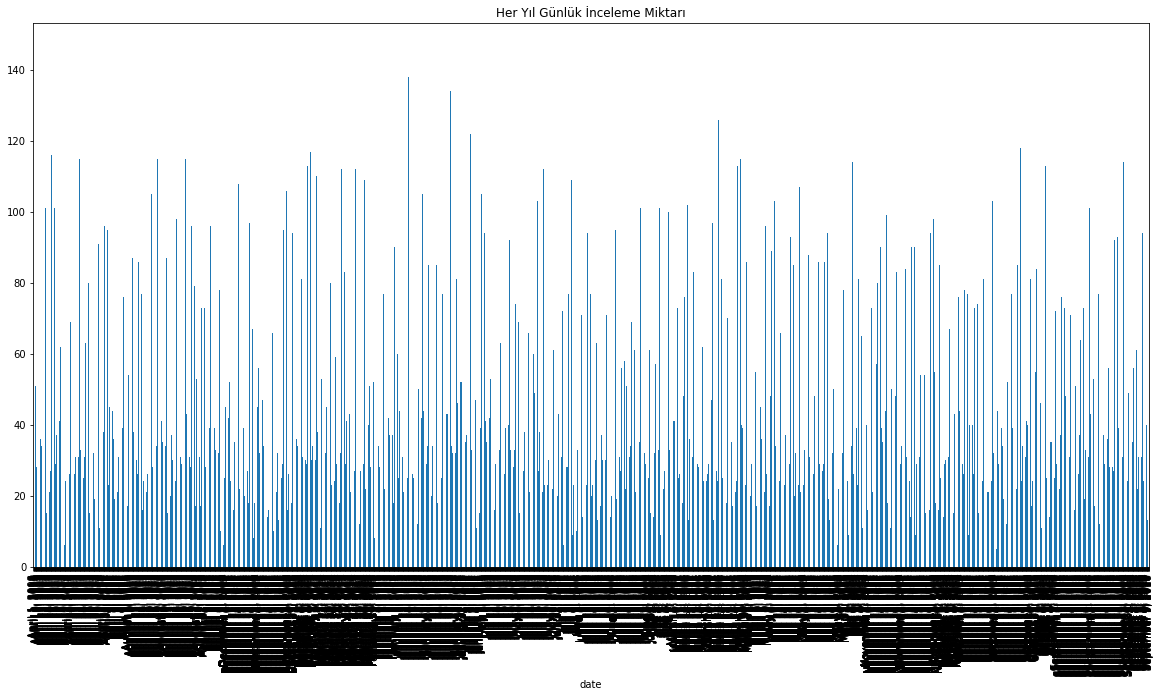

In [117]:
df.groupby('date')['review'].size().plot(kind='bar',figsize=(20,10))
plt.title("Her Yıl Günlük İnceleme Miktarı")
plt.show()

In [118]:
grouped_date = df.groupby('date').agg({'rating':np.mean,'usefulCount':np.sum,'review':np.size})


In [119]:
grouped_date


,rating,usefulCount,review
date,,,
"April 1, 2008",8.285714,2303,28
"April 1, 2009",7.666667,3698,21
"April 1, 2010",7.812500,342,16
"April 1, 2011",8.583333,216,12
"April 1, 2012",9.238095,1178,21
...,...,...,...
"September 9, 2013",8.295455,1941,44
"September 9, 2014",8.800000,2935,45
"September 9, 2015",5.733333,1901,90


In [120]:
grouped_date.index


Index(['April 1, 2008', 'April 1, 2009', 'April 1, 2010', 'April 1, 2011',
       'April 1, 2012', 'April 1, 2013', 'April 1, 2014', 'April 1, 2015',
       'April 1, 2016', 'April 1, 2017',
       ...
       'September 9, 2008', 'September 9, 2009', 'September 9, 2010',
       'September 9, 2011', 'September 9, 2012', 'September 9, 2013',
       'September 9, 2014', 'September 9, 2015', 'September 9, 2016',
       'September 9, 2017'],
      dtype='object', name='date', length=3579)

In [121]:
grouped_date['date'] = grouped_date.index


In [122]:
grouped_date['date'] = pd.DatetimeIndex(grouped_date['date'])


In [123]:
grouped_date.dtypes


rating                float64
usefulCount             int64
review                  int64
date           datetime64[ns]
dtype: object

In [124]:
grouped_date = grouped_date.set_index('date')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



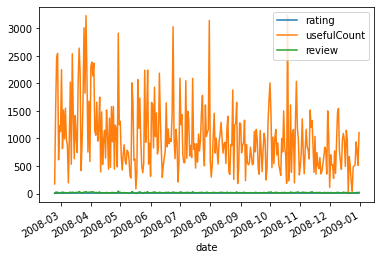

In [125]:
grouped_date['2008'].plot()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



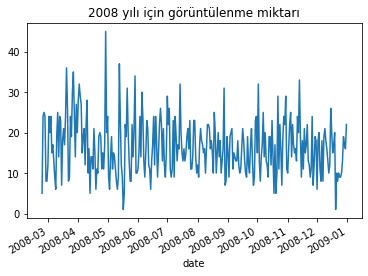

In [126]:
grouped_date['2008']['review'].plot()
plt.title("2008 yılı için görüntülenme miktarı")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



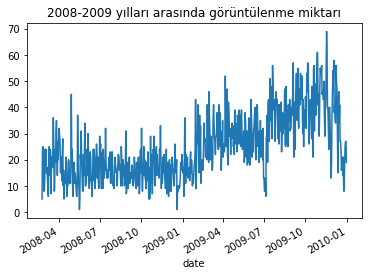

In [127]:
grouped_date['2008':'2009']['review'].plot()
plt.title("2008-2009 yılları arasında görüntülenme miktarı")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



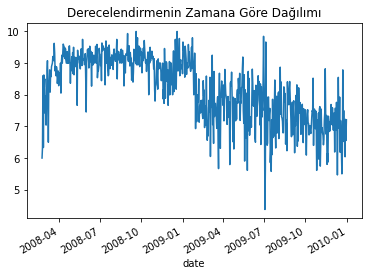

In [128]:
grouped_date['2008':'2009']['rating'].plot()
plt.title("Derecelendirmenin Zamana Göre Dağılımı")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



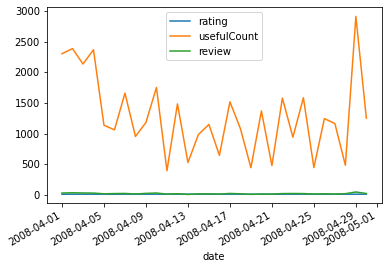

In [129]:
grouped_date['2008-04'].plot()


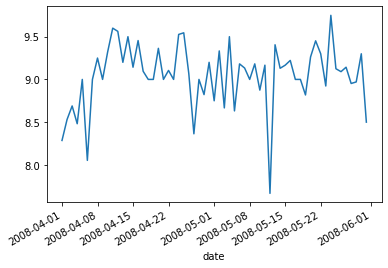

In [130]:
grouped_date['2008-4':'2008-5']['rating'].plot()
plt.show()
